<a href="https://colab.research.google.com/github/jamagiwa/math_visualize/blob/main/probability_theory/characteristic_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特性関数

## -正規分布をプロットしてみる

Φ(t) = e\^{izm-σ\^2 z^2/2} latexができないけど気にしない


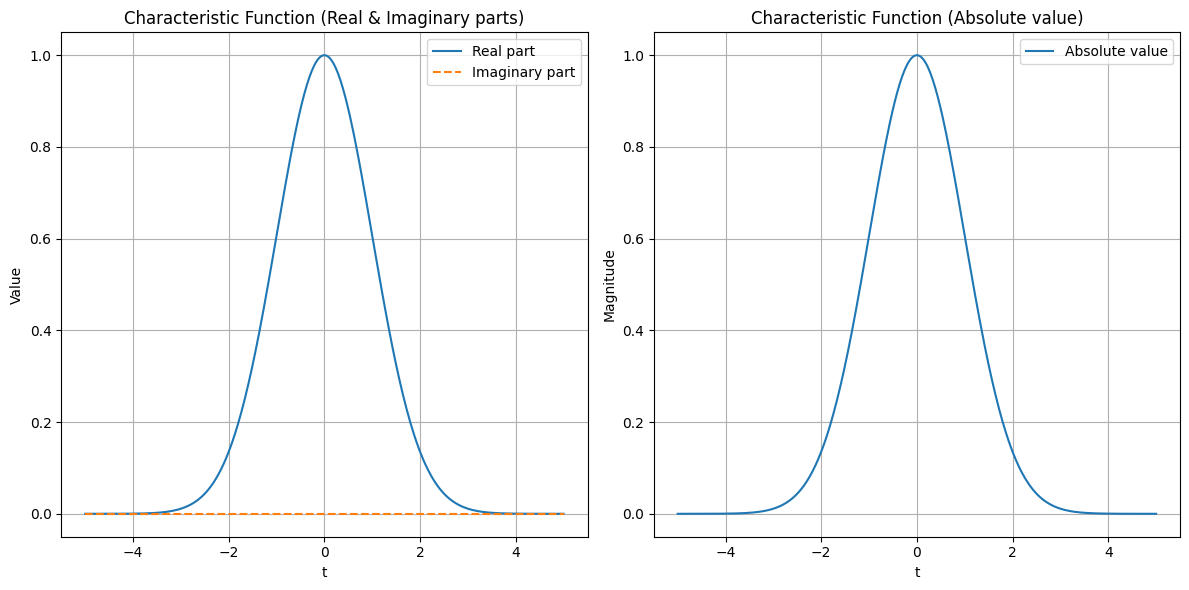

In [34]:
from re import M
import numpy as np
import matplotlib.pyplot as plt

#正規分布のパラメータ
m = 0 #平均 慣習でmと表記っぽい
sigma = 1 #標準偏差

#変数zの範囲指定
t = np.linspace(-5, 5, 400)

# 正規分布の特性関数　どうしてこうなった
phi_t = np.exp(1j * m * t - 0.5 * sigma**2 * t**2)

# グラフの描画, 描画する空間を用意しただけ
plt.figure(figsize=(12, 6))

#実部と虚部のプロット
plt.subplot(1, 2, 1) #描画空間を(1, 2)行列に分割して1番目に描画してと指定
plt.plot(t, phi_t.real, label='Real part') #tをx軸, yに関数のR部として折れ線グラフ
plt.plot(t, phi_t.imag, label='Imaginary part', linestyle='--')#yのC部分を点線で
plt.title('Characteristic Function (Real & Imaginary parts)')
plt.xlabel('t')
plt.ylabel('Value')
plt.grid(True)#方画用紙みたいな感じに
plt.legend()#凡例を入れる

# 絶対値をプロット
plt.subplot(1, 2, 2)
plt.plot(t, np.abs(phi_t), label='Absolute value')
plt.title('Characteristic Function (Absolute value)')
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## そもそもなぜ特性関数がE(e^izx)の形なのか

畳み込みによる正規分布の表現

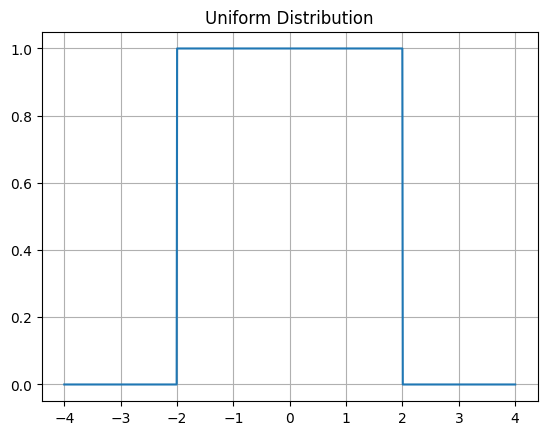

In [35]:
#一様分布
import numpy as np
import matplotlib.pyplot as plt

#[a, b]を定義
a = -2
b = 2

#グラフの描画
#x軸の範囲
#[a, b]を少し広げた範囲までx軸を描画
#範囲内を1000個の等間隔で分ける
x = np.linspace(a - 2, b + 2, 1000)

#y軸の値の計算
#条件に基づいて数を返す関数
y  = np.where(( x >= a) & (x <= b), height, 0)

#plotの描画
plt.plot(x, y, label = "Uniform distribution")
plt.title("Uniform Distribution")
plt.grid(True)
plt.show()

連続関数f, gの畳み込みf*g

(f*g)(t) = ∫f(τ)g(t - τ)dτ

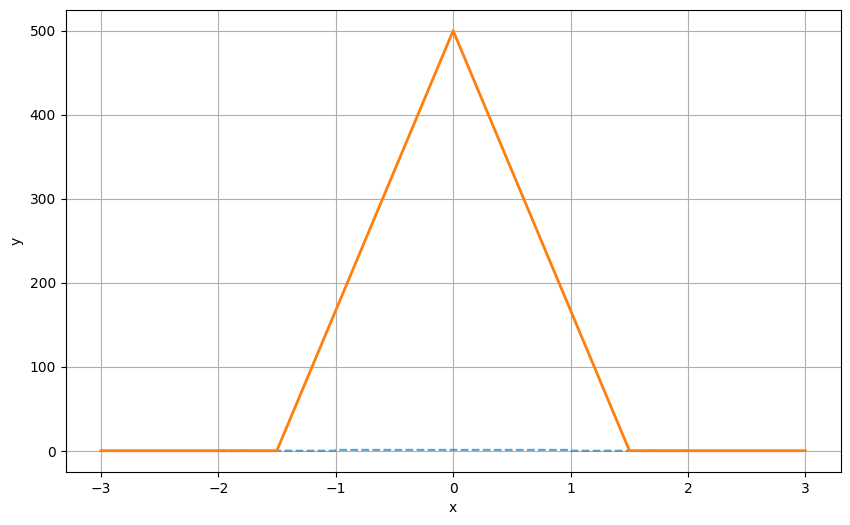

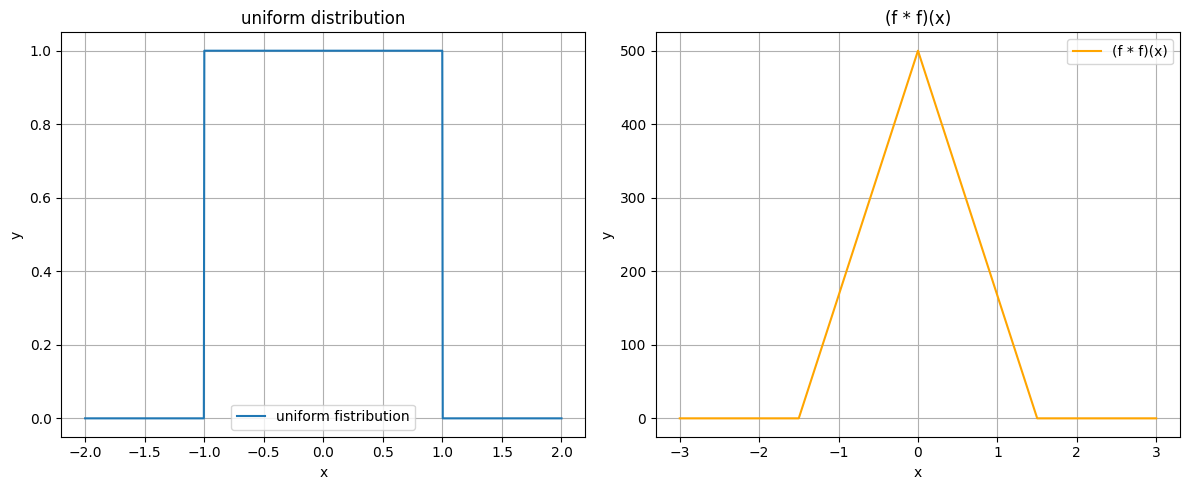

In [36]:
#一様分布の畳み込み
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

#一様分布の定義
x = np.linspace(-2, 2, 1000)
#np.abs...絶対値, xの絶対値が0.5以上ならy = 1.0でそれ以外は0
uniform_dist = np.where(np.abs(x) <=1, 1.0, 0)

#畳み込み積分の実行
conv_result = convolve(uniform_dist, uniform_dist, mode = "full")

#畳み込み後のx軸
conv_x = np.linspace(-3.0, 3.0,  len(conv_result))

#グラフの描画
plt.figure(figsize = (10, 6))

#元の一様分布
plt.plot(x, uniform_dist, label = "uniform_dist", linestyle = "--", alpha = 0.7)

#畳み込み結果
plt.plot(conv_x, conv_result, label = "(f*f)(x)", linewidth = 2)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

#一様分布と畳み込み後を別々に
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
#左側, 一様分布
axes[0].plot(x, uniform_dist, label ="uniform fistribution")
axes[0].set_title("uniform distribution")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].grid(True)
axes[0].legend()

#右側, 畳み込み後
axes[1].plot(conv_x, conv_result, label='(f * f)(x)', color='orange')
axes[1].set_title('(f * f)(x)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid(True)
axes[1].legend()

#出力
plt.tight_layout()
plt.show()


[2, -2]を1000個に分割している, [-1, 1]は500この点が存在するため、f*fは500になる。


fを確率測度、即ち0≦f(x)≦1にすれば良い